### 图像入门
学习目标：
- 图像的读取、显示、保存
- 学习三个函数：cv2.imread(), cv2.imshow() , cv2.imwrite()
- 使用 Matplotlib 来显示图像

In [1]:
# 导入常用包
#%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### 读取显示图像

In [2]:
img = cv2.imread("img.jpg", 0) # 1: 显示原始图， 0：灰度图  -1：加载图像包括 alpha 通道
cv2.imshow("image", img) # 第一个参数为显示窗口的名称，第二个参数是要显示的图像
k = cv2.waitKey(0) & 0xFF # cv2.waitKey()  键盘绑定函数，等待键盘按下，以毫秒为计数单位，也可以设定特定按键点击。64 bit 的机器要 cv2.waitKey(0) & 0xFF
if k == 27:         # 等待按下 ESC 键退出， 
    cv2.destroyAllWindows() # 销毁所有窗口，也可以用 cv2.destroyWindow() 销毁特定的窗口。
elif k == ord('s'): # 指定某个按键按下后指定某种操作，如这里是保存
    cv2.imwrite('image_write.png',img)
    cv2.destroyAllWindows()

结果：![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzkfz55k4hj206l05aq3g.jpg)

In [3]:
cv2.namedWindow("image_new", cv2.WINDOW_NORMAL) # 创建一个新的窗口，这个窗口大小可以进行调节的
cv2.imshow("image_new", img)
cv2.waitKey(0)
cv2.destroyWindow("image_new")

![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzkfzs4gu2j20ed0dimy8.jpg)

#### 写图像（保存图像）

In [4]:
cv2.imwrite("image_write.png", img) # 保存图像，可以指定保存图像的格式

True

![](https://ws1.sinaimg.cn/large/acbcfa39ly1fzkg0c5gl0j206q042dg2.jpg)

#### 使用 matplotlib 显示图像
Matplotlib是一个用于Python的绘图库，它提供了多种绘图方法。在这里，将学习如何使用 Matplotlib 显示图像。可以使用 Matplotlib 放大图片，保存图片等。

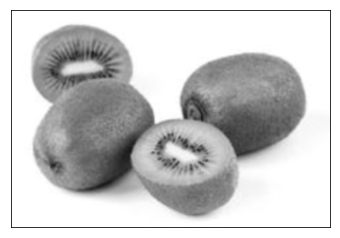

In [5]:
img = cv2.imread("img.jpg", 0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # interpolation 插值
plt.xticks([])
plt.yticks([])  # 隐藏 X、Y 坐标的刻度值
plt.show()

OpenCV 加载的彩色图像为 BGR 模式。但是 Matplotlib 以 RGB 模式显示。因此，如果使用 OpenCV 读取图像，Matplotlib 中的彩色图像将不能正确显示。

以下是解决办法：对图像的模式进行转换，使之与 Matplotlib 或 OpenCV 匹配

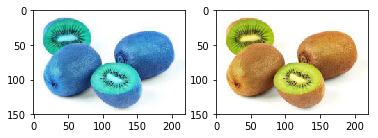

In [6]:
img_cv = cv2.imread("img.jpg") # OpenCV 读取图像
b, g, r = cv2.split(img_cv) # OpenCV 中图像显示是 BGR 模式，提取
img_matplot = cv2.merge([r, g, b])
plt.subplot(121)
plt.imshow(img_cv) # 预计图像会是异常的
plt.subplot(122)
plt.imshow(img_matplot) # 预计是真实的图像
plt.show()

cv2.imshow('bgr image',img_cv) # 预计图像会是异常的
cv2.imshow('rgb image',img_matplot) # 预计是真实的图像
cv2.waitKey(0)
cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39ly1fzkg0z3gt3j20cp059tbh.jpg)

#### 更多资料

[matplotlib 详细 API](https://matplotlib.org/api/pyplot_api.html)

### 视频入门
学习目标：
- 显示视频、保存视频
- 从相机进行捕获
- cv2.VideoCapture(), cv2.VideoWriter() 函数使用

#### 从相机捕获视频
笔记本自带摄像头

In [7]:
# 创建一个 VideoCapture 对象，参数是设备的索引即摄像机的编号或者 Video 的文件名
# 这里的 0 是指第一台摄像机，以此类推
cap = cv2.VideoCapture(0)
while (True):
    # while cap.isOpened():
    # 一帧一帧的捕获
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 显示
    cv2.imshow("frame", gray)  # 窗口名为 frame
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()  # 关闭视频文件或设备
cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzkg242htxj20i90egtda.jpg)

`cap.read()` 返回一个bool (True/False)。如果帧被正确读取，它将为真。通过检查这个返回值来检查视频的结尾。

有时，cap 可能没有初始化捕获。在这种情况下，这段代码显示错误。可以通过方法 `cap.isOpened()` 检查它是否初始化。如果为真，则 ok。否则使用 `cap.open()` 打开它。

可以通过 `cap.get(propId)` 获取视频的一些属性，propId 值为：0 to 18。每个值代表视频的一个属性，详见 [Property Identifier](https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-get) 也可以通过 `cap.set(propId, value)` 设置视频的属性。
例如：可以通过 `cap.get(3)` 和 `cap.get(4)` 检查帧的宽和高，默认是 640x480。通过 `ret = cap.set(3,320)` 和 `ret = cap.set(4,240)` 将宽和高重新设定。

In [8]:
# 创建一个 VideoCapture 对象，参数是设备的索引即摄像机的编号或者 Video 的文件名
# 这里的 0 是指第一台摄像机，以此类推
cap = cv2.VideoCapture(0)
while (True):
    # while cap.isOpened():
    # 一帧一帧的捕获
    ret, frame = cap.read()
    ret = cap.set(3, 320)
    ret = cap.set(4, 240)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow("frame", gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzkg30uoxgj209d07st9u.jpg)

#### 从文件进行播放

In [9]:
cap = cv2.VideoCapture('vtest.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39ly1fzkg48a9dtj20vz0lc0ys.jpg)

**如果视频播放结束，还没按键按下，会出现错误。** 改进如下：

In [10]:
import cv2
cap = cv2.VideoCapture('vtest.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)
    if ret == False:
        # cap.release() # 释放掉开启的视频
        # print("1") # 测试

        cv2.waitKey(0)  # 暂停在最后一帧
        break  # 关闭窗口后退出
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

改进以后，程序会一直监测视频是否到最后一帧，若是最后一帧，则 ret 为 False ，暂停在最后一帧并且在关闭窗口后退出

#### 保存视频

In [11]:
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
# cv2.VideoWriter_fourcc('X','V','I','D') 功能一样
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# 创建 VideoWriter 对象，指定输出文件名 output.avi， FourCC 代码，传递每秒帧数和帧大小
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        # 对每一帧进行翻转
        frame = cv2.flip(frame, 0)  # 注释见下

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

FourCC 是一个 4 字节的代码，用于指定视频编解码器，**依赖于平台**，到时看具体平台进行选择。更多 FourCC 代码见 [官网](http://www.fourcc.org/)

`cv2.flip(src, flipCode[, dst]) → dst`: flipCode: 0表示绕 x 轴翻转，正值(例如，1)表示绕 y 轴翻转。负值(例如 -1)表示在两个轴上翻转。

#### 更多资料
[opencv documentation](https://docs.opencv.org/2.4/index.html#)

### OpenCV 绘图功能
学习目标:
- 使用 OpenCV 绘制不同几何形状
- cv2.line(), cv2.circle() , cv2.rectangle(), cv2.ellipse(), cv2.putText()

以下图像都用 matplotlib 绘制

#### 函数共有参数说明
- img: 要操作的图像
- color：绘制形状的颜色， RGB 传入元组如(255, 255, 255)， 灰度值只需传入标量
- thickness：线或圆等的厚度。如果对圆形等闭合图形传递 -1 ，则填充形状。默认为 1
- lineType：线的类型

#### 绘制各种形状

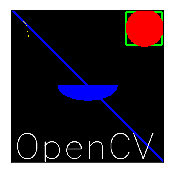

In [12]:
# 需要给定直线的起始和结束坐标

# 创建一个黑色的画布
img = np.zeros((512, 512, 3), np.uint8)

# 绘制坐标 (0, 0) -> (510, 128) 直线 蓝色，厚度为 5px
img = cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)  # OpenCV 为 BGR 模式
# 绘制长方形，起始和终点坐标，颜色，厚度
img = cv2.rectangle(img, (384, 10), (505, 120), (0, 255, 0), 3)
# 绘制圆形，给定圆心，半径，最后 -1 为图形填充
img = cv2.circle(img, (447, 63), 63, (0, 0, 255), -1)
# 绘制椭圆，椭圆心，长轴，短轴，角度，起始结束角，填充
img = cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, 255, -1)
# 绘制多边形，给定多边形的顶点坐标
pts = np.array([[50, 50], [40, 40], [60, 40], [60, 100]], np.int32)
pts = pts.reshape((-1, 1, 2))
# 若第三个参数为 False，则得到连接所有点的折线，而不是一个闭合的形状。该函数可以用来绘制多条直线
img = cv2.polylines(img, [pts], True, (0, 255, 255))
# 添加文字到图形中
font = cv2.FONT_HERSHEY_SIMPLEX  # 指定字体
cv2.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255),
            2, cv2.LINE_AA)  # 绘制的图像，文字，文字左下角的坐标,字体，字体颜色，厚度等

cv2.imshow("diff type", img)
k = cv2.waitKey(0) & 0xFF
if k == 27:
    cv2.destroyAllWindows()


b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzkg6y64ejj20ep0fcgly.jpg)

作业：绘制 OpenCV 图标 ![](https://opencv-python-tutroals.readthedocs.io/en/latest/_static/opencv-logo-white.png)

#### 更多资料
- [绘制椭圆时角度的确定](http://answers.opencv.org/question/14541/angles-in-ellipse-function/)
- [本小节见此](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html)
- [Ascii 表](http://www.asciitable.com/)

### 鼠标作为画笔
学习目标：
- 处理鼠标事件
- cv2.setMouseCallback()

#### 简单 Demo

首先，创建一个鼠标回调函数，该函数在鼠标事件发生时执行。鼠标事件可以是任何与鼠标相关的东西，如左键向下、左键向上、左键双击等。它为每个鼠标事件提供坐标 (x,y)。有了这个事件和位置，我们可以做任何我们想做的事情。

In [13]:
# 列出鼠标处理的事件
events = [i for i in dir(cv2) if 'EVENT' in i]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [14]:
import cv2
import numpy as np
# 功能函数，在鼠标处左键双击，绘制白色填充的圆
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), 100, (255, 255, 255), -1)


# 创建一个黑色画布
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow("image")
# 创建鼠标回调函数，绑定功能函数
cv2.setMouseCallback("image", draw_circle)

while(1):
    cv2.imshow("image", img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzkg7jvqtyj20ep0fc3yl.jpg)

#### 高级 Demo

现在我们要做更多更好的应用。在这里，通过拖动鼠标来绘制矩形或圆形(这取决于我们选择的模式)，就像在 Paint 应用程序中所做的那样。我们的鼠标回调函数有两部分，一部分用来画矩形，另一部分用来画圆。这个具体的例子将非常有助于创建和理解一些交互式应用程序，如**对象跟踪，图像分割等。**

In [15]:
import cv2
import numpy as np

drawing = False # 鼠标按下为 True
mode = True # 按键 'm' 切换模式
ix, iy = -1, -1


def draw(event, x, y, flags, param):
    global ix, iy, drawing, mode

    if event == cv2.EVENT_LBUTTONDOWN: # 鼠标放下
        drawing = True
        ix, iy = x, y # 鼠标放下时的坐标

    elif event == cv2.EVENT_MOUSEMOVE: # 鼠标移动
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            else:
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

    elif event == cv2.EVENT_LBUTTONUP: # 鼠标提起，结束绘制
        drawing = False
        # ------------- 中间这一段要不要？
        if mode == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        else:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)    
        # -------------


img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw) # 功能绑定

while(1):
    cv2.imshow("image", img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'): # 按键 'm' 切换模式
        mode = not mode
    elif k == 27:
        break
        
cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39ly1fzkg8f7ktpj20ep0fc0ss.jpg)

### 轨迹栏作为调色板
学习目标：
- 将轨迹栏绑定到 OpenCV 窗口
- cv2.getTrackbarPos(), cv2.createTrackbar()

#### Demo
创建简单的应用程序，通过滑动轨迹条调节 BGR 的值从而改变画布颜色，初始颜色为黑色。

cv2.createTrackbar() 函数，第一个参数是 trackbar 名称，第二个参数是将用作创建的 trackbar 的父窗口的名称，第三个参数是默认值，第四个参数是最大值，第五个参数是回调函数，每次 trackbar 值发生变化时都会执行回调函数。回调函数总是有一个默认参数，即 trackbar 位置。在我们的例子中，函数什么也不做，所以我们只是传递。

trackbar 的另一个重要应用是将其用作按钮或开关。默认情况下，OpenCV 没有按钮功能。所以你可以使用 trackbar 来获得这样的功能。在我们的应用程序中，我们已经创建了一个开关，在这个开关中应用程序只在开关打开时才工作，否则屏幕总是黑色的。

In [16]:
import cv2
import numpy as np


def nothing(x):
    pass


img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow("image")

cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39ly1fzkg8wan3cj20ep0ga74d.jpg)

#### 练习
创建一个画笔颜色和笔刷半径可调的滑动轨迹条

In [17]:
import cv2
import numpy as np


def nothing(x):
    pass


radius_t = 1
bt, gt, rt = 255, 255, 255


def draw_circle(event, x, y, radius, b=255, g=255, r=255):
    global radius_t, bt, gt, rt
    radius = radius_t
    b, g, r = bt, gt, rt
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), radius, (b, g, r), -1)


img = np.zeros((1366, 768, 3), np.uint8)
cv2.namedWindow("image")

# --------- 画笔颜色
cv2.createTrackbar('brush_radius', 'image', 1, 10, nothing)
cv2.createTrackbar('pen_B', 'image', 0, 255, nothing)
cv2.createTrackbar('pen_G', 'image', 0, 255, nothing)
cv2.createTrackbar('pen_R', 'image', 0, 255, nothing)


# 创建鼠标回调函数，绑定功能函数
cv2.setMouseCallback("image", draw_circle)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
    brush_radius = cv2.getTrackbarPos('brush_radius', 'image')
    pen_B = cv2.getTrackbarPos('pen_B', 'image')
    pen_G = cv2.getTrackbarPos('pen_G', 'image')
    pen_R = cv2.getTrackbarPos('pen_R', 'image')

    # 对鼠标函数参数进行赋值
    radius_t = brush_radius 
    bt, gt, rt = pen_B, pen_G, pen_R

cv2.destroyAllWindows()

![](https://ws1.sinaimg.cn/large/acbcfa39ly1fzkg9qsow0j20lt0kwq3a.jpg)

#### 更多资料
[createtrackbar API](https://docs.opencv.org/2.4/modules/highgui/doc/user_interface.html?highlight=createtrackbar)